In [31]:
import cv2
import cvzone
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,MaxPooling2D
from keras.models import Model,Sequential

In [33]:
base_dir='age_dataset/'

In [34]:
image_path=[]
age_label=[]
gender_label=[]

In [35]:
for filename in os.listdir(base_dir):
    img_path=os.path.join(base_dir,filename)
    temp=filename.split('_')
    age=int(temp[0])
    gender=int(temp[1])
    image_path.append(img_path)
    age_label.append(age)
    gender_label.append(gender)

In [36]:
df=pd.DataFrame()
df['Image']=image_path
df['Age']=age_label
df['Gender']=gender_label
df.head()

,Image,Age,Gender
0,age_dataset/100_0_0_20170112213500903.jpg.chip...,100,0
1,age_dataset/100_0_0_20170112215240346.jpg.chip...,100,0
2,age_dataset/100_1_0_20170110183726390.jpg.chip...,100,1
3,age_dataset/100_1_0_20170112213001988.jpg.chip...,100,1
4,age_dataset/100_1_0_20170112213303693.jpg.chip...,100,1


In [37]:
gender_map={0:'Male',1:'Female'}

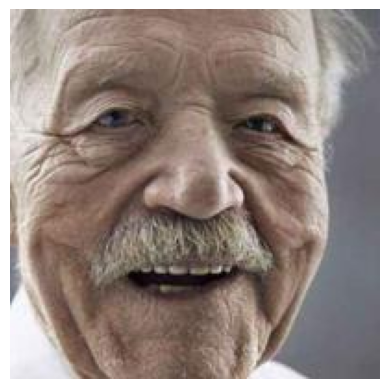

In [38]:
from PIL import Image
img=Image.open(df['Image'][0])
plt.axis("off")
plt.imshow(img)
plt.show()

In [39]:
def extract_features(images):
    features=[]
    for image in images:
        img=load_img(image,color_mode="grayscale")
        img=img.resize((128,128),Image.LANCZOS)
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),128,128,1)
    return features

In [40]:
X=extract_features(df['Image'])

In [41]:
X.shape

(23708, 128, 128, 1)

In [42]:
X=X/255.0

In [43]:
y_gender=np.array(df['Gender'])
y_age=np.array(df['Age'])

In [44]:
y_age.shape,y_gender.shape

((23708,), (23708,))

In [45]:
input_shape=(128,128,1)

inp=Input((input_shape))

c1=Conv2D(32,kernel_size=(3,3),activation='relu') (inp)
maxp1=MaxPooling2D(pool_size=(2,2)) (c1)

c2=Conv2D(64,kernel_size=(3,3),activation='relu') (maxp1)
maxp2=MaxPooling2D(pool_size=(2,2)) (c2)

c3=Conv2D(128,kernel_size=(3,3),activation='relu') (maxp2)
maxp3=MaxPooling2D(pool_size=(2,2)) (c3)

c4=Conv2D(256,kernel_size=(3,3),activation='relu') (maxp3)
maxp4=MaxPooling2D(pool_size=(2,2)) (c4)

fl=Flatten() (maxp4)

d1=Dense(256,activation='relu') (fl)
drop1=Dropout(0.3) (d1)
out1=Dense(1,name="gender_out",activation="sigmoid") (drop1)

d2=Dense(512,activation='relu') (fl)
drop2=Dropout(0.3) (d2)
out2=Dense(1,name="age_out",activation='relu') (drop2)

model=Model(inputs=[inp],outputs=[out1,out2])

model.compile(
    optimizer='adam',
    loss={'age_out': 'mae', 'gender_out': 'binary_crossentropy'},
    metrics={'age_out': 'mae', 'gender_out': 'accuracy'}
)
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_24 (Conv2D)            │ (None, 126, 126, 32)      │             320 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_24              │ (None, 63, 63, 32)        │               0 │ conv2d_24[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_25 (Conv2D)            │ (None, 61, 61, 64)        │          18,496 │ max_pooling2d_24[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_25              │ (None, 30, 30, 64)        │               0 │ conv2d_25[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_26 (Conv2D)            │ (None, 28, 28, 128)       │          73,856 │ max_pooling2d_25[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_26              │ (None, 14, 14, 128)       │               0 │ conv2d_26[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_27 (Conv2D)            │ (None, 12, 12, 256)       │         295,168 │ max_pooling2d_26[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_27              │ (None, 6, 6, 256)         │               0 │ conv2d_27[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_6 (Flatten)           │ (None, 9216)              │               0 │ max_pooling2d_27[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 256)               │       2,359,552 │ flatten_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 512)               │       4,719,104 │ flatten_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_12 (Dropout)          │ (None, 256)               │               0 │ dense_16[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_13 (Dropout)          │ (None, 512)               │               0 │ dense_17[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_out (Dense)            │ (None, 1)                 │             257 │ dropout_12[0][0]           │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,467,266 (28.49 MB)

 Trainable params: 7,467,266 (28.49 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history=model.fit(x=X,y=[y_gender,y_age],batch_size=32,validation_split=0.2,epochs=30)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - age_out_mae: 11.5870 - gender_out_accuracy: 0.5153 - loss: 12.2913 - val_age_out_mae: 34.2996 - val_gender_out_accuracy: 0.6040 - val_loss: 34.9591
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 169s 284ms/step - age_out_mae: 8.4372 - gender_out_accuracy: 0.7151 - loss: 8.9927 - val_age_out_mae: 28.1088 - val_gender_out_accuracy: 0.7566 - val_loss: 28.6221
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 153s 258ms/step - age_out_mae: 7.0160 - gender_out_accuracy: 0.8196 - loss: 7.4110 - val_age_out_mae: 27.6494 - val_gender_out_accuracy: 0.7807 - val_loss: 28.1140
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 145s 245ms/step - age_out_mae: 6.4478 - gender_out_accuracy: 0.8415 - loss: 6.7984 - val_age_out_mae: 26.0469 - val_gender_out_accuracy: 0.7923 - val_loss: 26.4962
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 148s 250ms/step - age_out_mae: 5.9932 - gender_out_accuracy: 0.8562 - loss: 6.3109 - val_age_out_mae: 23.1234 - val_gender_out_accuracy: 0.753

In [53]:
from keras.models import load_model
model.save('ANN_face_gender.h5')

import pickle
with open('res_model.pkl', 'wb') as f:
    pickle.dump(model,f)

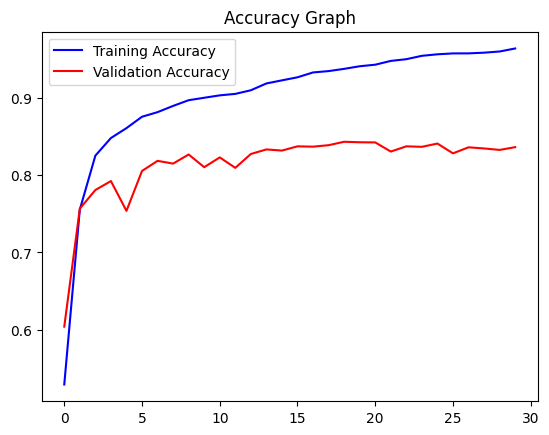

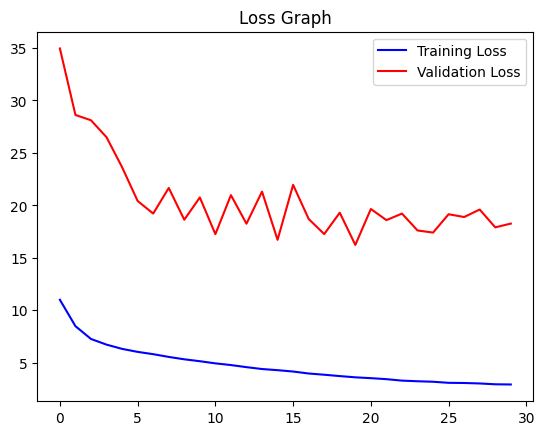

In [47]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

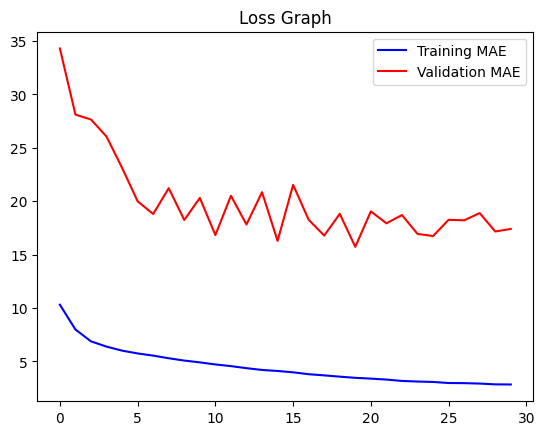

In [54]:
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()